# Install PRAW using pip

In [3]:
pip install praw

  Obtaining dependency information for praw from https://files.pythonhosted.org/packages/81/6a/21bc058bcccbe03f6a0895bf1bd60c805f0c526aa4e9bfaac775ed0b299c/praw-7.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for prawcore<3,>=2.1 from https://files.pythonhosted.org/packages/96/5c/8af904314e42d5401afcfaff69940dc448e974f80f7aa39b241a4fbf0cf1/prawcore-2.4.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 2.7 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


# Importing PRAW Module

In [5]:
import praw  #Importing PRAW Module

# Setting up User Agent and Creating Reddit Instance

In [6]:
user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036" # Setting up user agent for Reddit API request
# Creating Reddit instance with provided credentials
reddit = praw.Reddit(
    client_id="JscllAUl-9HYEkj3-peK8Q",  # Inserting client ID
    client_secret="zrNFBmpLwN8lXffm2rJB0wlkB8d-ZA", # Inserting client secret
    user_agent=user_agent
)

# Importing Data Manipulation and Numerical Libraries


In [7]:
import pandas as pd  # Importing pandas library as pd for data manipulation
import numpy as np   # Importing numpy library as np for numerical operations
# Importing re module for using regular expressions
import re #RegEx : Regular expression     

# Extracting Information from Hot Topics in Bitcoin Subreddit

In [8]:
# Hot new rising topics

headlines = set()
# Iterating through submissions in the hot section of the Bitcoin subreddit
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    print(submission.title)  #Subreddit Title
    print(submission.id)     #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Bitcoin Newcomers FAQ - Please read!
16bm9de
BitcoinFan7
1694011779.0
212
0.95
https://www.reddit.com/r/Bitcoin/comments/16bm9de/bitcoin_newcomers_faq_please_read/
0


# Counting Unique Headlines in Bitcoin Subreddit

In [9]:
# Counting the Number of Unique Headlines from Reddit's Bitcoin Subreddit
headlines = set()
# Iterating through submissions in the hot section of the Bitcoin subreddit and adding titles to a set to ensure uniqueness
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

740


# Creating DataFrame from Scraped Data


In [10]:
#Create a dataframe from the scrapped data 
bitcoin_df = pd.DataFrame(headlines) # Creating a DataFrame named bitcoin_df from the headlines data
bitcoin_df.head() # Displaying the first few rows of the DataFrame

,0
0,I need a whole new computer just to run Ledger...
1,Bankers Blaming Bitcoin (ESG Attack)
2,I highly recommend the audiobook. Laura Lieben...
3,"He who laughs at bitcoiners, laughs worst at last"
4,@blockfi and @btc Talk to me…


# Retrieving DataFrame Columns

In [11]:
bitcoin_df.columns  # Retrieving DataFrame Columns

RangeIndex(start=0, stop=1, step=1)

# Displaying DataFrame with Renamed Columns

In [13]:
bitcoin_df.head()  # Displaying DataFrame with Renamed Columns

,Titles
0,I need a whole new computer just to run Ledger...
1,Bankers Blaming Bitcoin (ESG Attack)
2,I highly recommend the audiobook. Laura Lieben...
3,"He who laughs at bitcoiners, laughs worst at last"
4,@blockfi and @btc Talk to me…


# Renaming DataFrame Columns

In [12]:
bitcoin_df.columns = ['Titles']   # Renaming DataFrame Columns

# Counting Duplicated Titles in the 'Titles' Column


In [14]:
bitcoin_df.Titles.duplicated().sum()  # Counting Duplicated Titles in the 'Titles' Column

0

# Text Cleaning: Removing Mentions, Hashtags, Retweets, Hyperlinks, and Colons

In [15]:
#Clean the text

# Function to clean the text by removing mentions, hashtags, retweets, hyperlinks, and colons
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

# Cleaning the text in the 'Titles' column using the cleanTxt function
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(cleanTxt)

# Displaying the clean text
bitcoin_df.head()

,Titles
0,I need a whole new computer just to run Ledger...
1,Bankers Blaming Bitcoin (ESG Attack)
2,I highly recommend the audiobook. Laura Lieben...
3,"He who laughs at bitcoiners, laughs worst at last"
4,and Talk to me…


# Removing Emoji and Unicode Characters from Text


In [16]:
# Function to remove emoji and Unicode characters from text
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# Cleaning the text in the 'Titles' column using the remove_emoji function
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)

# Displaying the clean text
bitcoin_df.head()

,Titles
0,I need a whole new computer just to run Ledger...
1,Bankers Blaming Bitcoin (ESG Attack)
2,I highly recommend the audiobook. Laura Lieben...
3,"He who laughs at bitcoiners, laughs worst at last"
4,and Talk to me…


# Installing TextBlob Package

In [17]:
pip install textblob  # Installing TextBlob Package

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 1.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


# Installing WordCloud Package

In [18]:
pip install wordcloud  # Installing WordCloud Package

Note: you may need to restart the kernel to use updated packages.


# Importing TextBlob and WordCloud Libraries

In [19]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

# Analyzing Text Sentiment: Subjectivity and Polarity

In [20]:
# Function to get the subjectivity of text using TextBlob
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Function to get the polarity of text using TextBlob
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Adding new columns for subjectivity and polarity to the bitcoin_df DataFrame
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

# Displaying the updated DataFrame
bitcoin_df.head()

,Titles,Subjectivity,Polarity
0,I need a whole new computer just to run Ledger...,0.451515,0.157576
1,Bankers Blaming Bitcoin (ESG Attack),0.000000,0.000000
2,I highly recommend the audiobook. Laura Lieben...,0.770000,0.280000
3,"He who laughs at bitcoiners, laughs worst at last",0.533333,-0.500000
4,and Talk to me…,0.000000,0.000000


# Categorizing Text Polarity: Negative, Neutral, Positive

In [21]:
# Function to categorize polarity scores into negative, neutral, or positive categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Applying the getInsight function to create a new column 'Insight' in the bitcoin_df DataFrame
bitcoin_df["Insight"] = bitcoin_df["Polarity"].apply(getInsight)

# Displaying the first 50 rows of the DataFrame
bitcoin_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,I need a whole new computer just to run Ledger...,0.451515,0.157576,Positive
1,Bankers Blaming Bitcoin (ESG Attack),0.000000,0.000000,Neutral
2,I highly recommend the audiobook. Laura Lieben...,0.770000,0.280000,Positive
3,"He who laughs at bitcoiners, laughs worst at last",0.533333,-0.500000,Negative
4,and Talk to me…,0.000000,0.000000,Neutral
5,It took me too long to steal and upload the vid,0.400000,-0.050000,Negative
6,Opinions on Exchange Rate provider and why to ...,0.900000,0.500000,Positive
7,Is it especulation or simple math? Have you so...,0.357143,0.000000,Neutral
8,Bukele Wins Again! What's Next for Bitcoin in ...,0.100000,0.187500,Positive
9,"2015 Berkley Business School talk ""Why Bitcoin...",0.000000,0.000000,Neutral


# Importing Visualization Libraries and Configuring Style


In [22]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# Setting the style for matplotlib plots
plt.style.use('fivethirtyeight')

# Plotting Bitcoin Sentiment Scores

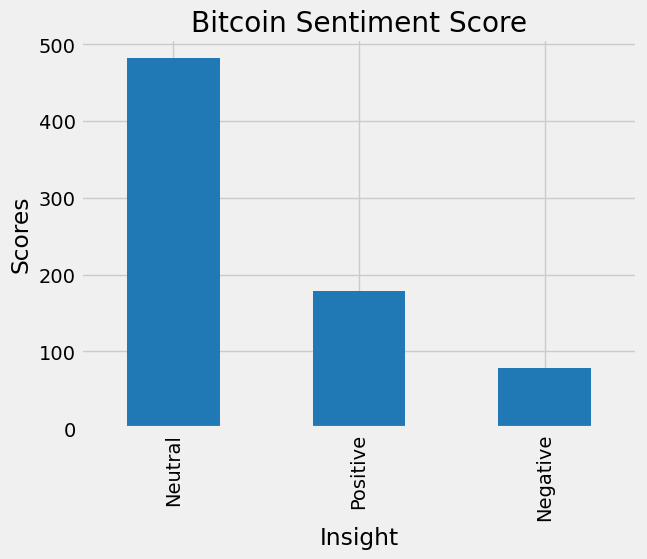

In [23]:
# Plotting the Value Counts of Sentiment
# Setting the title, x-label, and y-label for the plot
plt.title("Bitcoin Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
# Setting the size of the plot
plt.rcParams["figure.figsize"] = (10,8)
# Plotting the value counts of sentiment as a bar plot
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
# Displaying the plot
plt.show()

# Generating Word Cloud from Bitcoin Titles


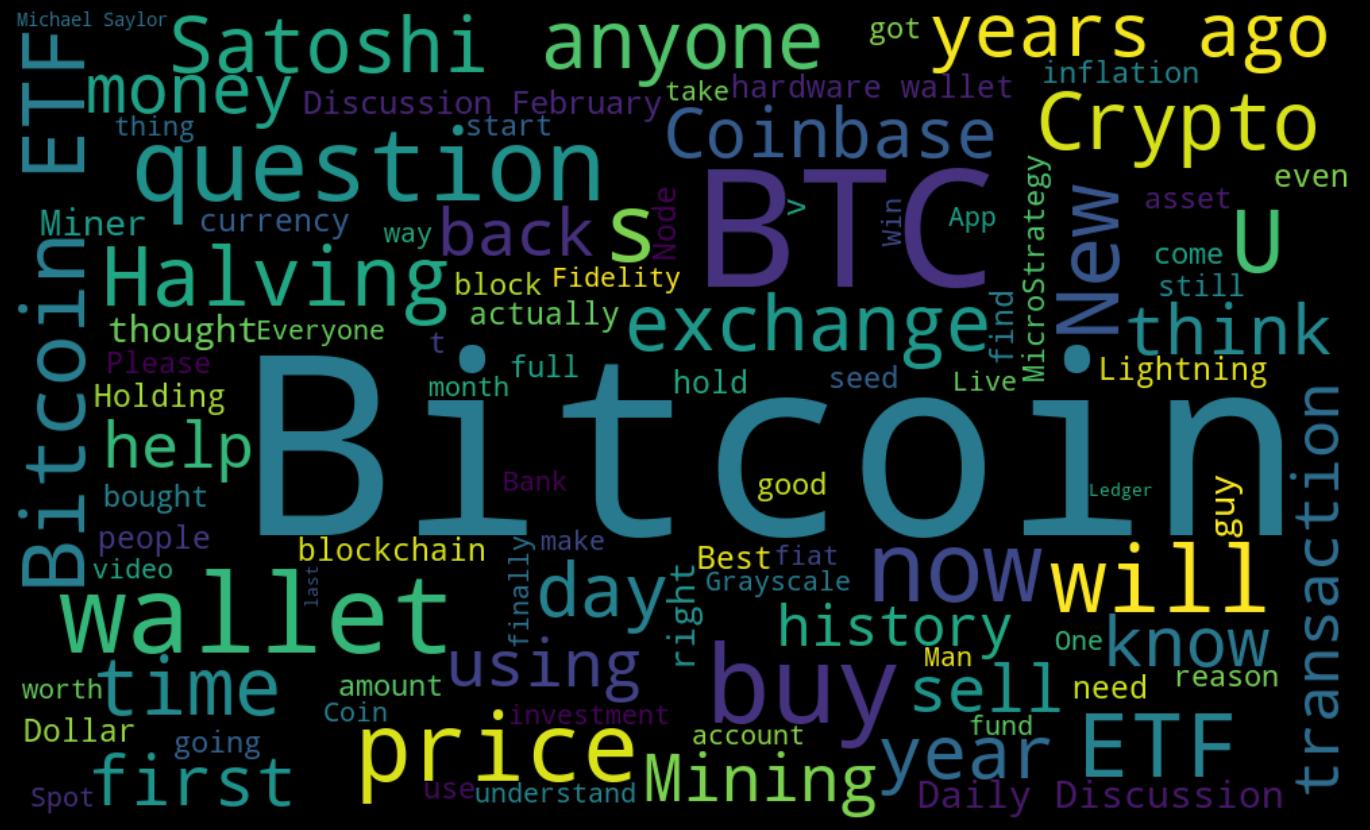

In [24]:
# Joining all titles into a single text
text = ' '.join( [twts for twts in bitcoin_df['Titles']] ) #To join all tweet
# generating word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

# Displaying the generated word cloud image
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");